# 1. Introduction

#### Title: Data Processing for Global Fishing Watch
Description: This notebook outlines the steps for loading, cleaning, and preprocessing the datasets for the Global Fishing Watch project.

#### 2. Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

#### 3. Load Data
Description: Load the datasets from CSV files

In [2]:
# base directory specification
base_dir = os.path.join(os.path.expanduser("~"), 'Downloads', 'globalfishingwatch', 'data')

# Load datasets
ports_data = pd.read_csv(os.path.join(base_dir, 'CVP_ports_20240614.csv'))
loitering_data = pd.read_csv(os.path.join(base_dir, 'CVP_loitering_20240614.csv'))
encounters_data = pd.read_csv(os.path.join(base_dir, 'CVP_encounters_20240614.csv'))

# Display the first few rows of each dataset
display(ports_data.head(), loitering_data.head(), encounters_data.head())


,event_id,event_type,vessel_id,event_start,event_end,lat_mean,lon_mean,lat_min,lat_max,lon_min,lon_max,event_info,event_vessels,event_geography
0,96f6c2feae0ffc2e4d0839deb92dfbef,port,fdd17ef41-19d2-7120-5425-2a363b52e09f,2024-06-01 10:43:51 UTC,2024-06-03 10:00:04 UTC,1.219317,103.806731,1.223001,1.213267,103.547043,103.829931,"{""anchorage_lat"":1.219317,""anchorage_lon"":103....","[{""id"":""fdd17ef41-19d2-7120-5425-2a363b52e09f""...",POINT(103.806730694444 1.21931680555556)
1,b53cfbaead55d481fa443891307e60e4,port,0cc1584b7-7429-bc34-a1ac-28a2e3561da3,2024-06-02 06:06:14 UTC,2024-06-02 23:18:29 UTC,1.211352,103.760243,1.223001,1.213267,103.547043,103.829931,"{""anchorage_lat"":1.211352,""anchorage_lon"":103....","[{""id"":""0cc1584b7-7429-bc34-a1ac-28a2e3561da3""...",POINT(103.76024325 1.21135175)
2,6a63bb48b0f47eddc881d2af1931c5ac,port,6ed03e523-3166-0afa-d32c-d9d1d89da13d,2024-06-01 18:52:14 UTC,2024-06-03 23:49:25 UTC,1.222519,103.815753,1.209814,1.249971,103.576470,103.933021,"{""anchorage_lat"":1.222519,""anchorage_lon"":103....","[{""id"":""6ed03e523-3166-0afa-d32c-d9d1d89da13d""...",POINT(103.8157531875 1.22251910416667)
3,b01dc158886cb6e833e9d9970049d3a5,port,c86d4a3d1-1e8c-8a30-f02c-31a29cb9a7ef,2024-06-01 21:44:29 UTC,2024-06-02 23:07:15 UTC,1.231405,103.814507,1.209814,1.249971,103.576470,103.933021,"{""anchorage_lat"":1.231405,""anchorage_lon"":103....","[{""id"":""c86d4a3d1-1e8c-8a30-f02c-31a29cb9a7ef""...",POINT(103.814507407407 1.23140546296296)
4,4c05f4c520cfa2e0987e49ea35d3e9c5,port,f2fa3318a-a4eb-f6b8-b648-97f905351a65,2024-06-02 00:31:09 UTC,2024-06-02 23:12:12 UTC,1.222080,103.799988,1.214283,1.249971,103.570217,103.933021,"{""anchorage_lat"":1.22208,""anchorage_lon"":103.7...","[{""id"":""f2fa3318a-a4eb-f6b8-b648-97f905351a65""...",POINT(103.799987777778 1.22208)


,event_id,event_type,vessel_id,event_start,event_end,lat_mean,lon_mean,lat_min,lat_max,lon_min,lon_max,event_info,event_vessels,event_geography
0,5491cbdadd0260d7e3be433e3d748783,loitering,027edc2d0-0d92-960b-4614-8573eaac7a59,2024-06-07 06:58:13 UTC,2024-06-07 10:55:45 UTC,40.044329,131.034551,40.027872,40.060787,131.005777,131.063325,"{""median_speed_knots"":""0.965"",""total_distance_...","[{""id"":""027edc2d0-0d92-960b-4614-8573eaac7a59""...",POINT(131.034550833333 40.0443291666667)
1,a0ec330cffc6dbcf2df4f8bf64f8dc53,loitering,027edc2d0-0d92-960b-4614-8573eaac7a59,2024-06-08 00:59:05 UTC,2024-06-08 02:58:34 UTC,38.260113,129.995975,38.255298,38.264928,129.992845,129.999105,"{""median_speed_knots"":""0.337"",""total_distance_...","[{""id"":""027edc2d0-0d92-960b-4614-8573eaac7a59""...",POINT(129.995975 38.2601133333333)
2,48c3d303f014f989ac6e5dc2125d9cff,loitering,027edc2d0-0d92-960b-4614-8573eaac7a59,2024-06-07 11:57:03 UTC,2024-06-07 12:58:19 UTC,40.022852,131.064668,40.027452,40.018252,131.062108,131.067228,"{""median_speed_knots"":""1.017"",""total_distance_...","[{""id"":""027edc2d0-0d92-960b-4614-8573eaac7a59""...",POINT(131.064668333333 40.0228516666667)
3,f6a904edc52c8955ae27470389a009d7,loitering,02e1c2093-34c5-c39a-55fc-da47d4ce5311,2024-06-07 08:59:28 UTC,2024-06-07 14:52:19 UTC,-5.231460,152.700738,-5.203608,-5.259312,152.783188,152.618287,"{""median_speed_knots"":""1.775"",""total_distance_...","[{""id"":""02e1c2093-34c5-c39a-55fc-da47d4ce5311""...",POINT(152.7007375 -5.23146)
4,a6835127682e53aafd91da3e0b710b11,loitering,05587f648-8902-23a1-8fe9-ec9865dacf08,2024-06-10 15:59:02 UTC,2024-06-10 20:59:05 UTC,-30.302958,83.681908,-30.326117,-30.279800,83.671350,83.692467,"{""median_speed_knots"":""0.594"",""total_distance_...","[{""id"":""05587f648-8902-23a1-8fe9-ec9865dacf08""...",POINT(83.6819083333333 -30.3029583333333)


,event_id,event_type,vessel_id,event_start,event_end,lat_mean,lon_mean,lat_min,lat_max,lon_min,lon_max,event_info,event_vessels,event_geography
0,f95439282324fdc7a89b50234ab5b295.1,encounter,05587f648-8902-23a1-8fe9-ec9865dacf08,2024-06-11 00:00:00 UTC,2024-06-11 09:00:00 UTC,-30.163924,83.676057,-30.163924,-30.163924,83.676057,83.676057,"{""median_distance_km"":""0.014"",""median_speed_kn...","[{""id"":""05587f648-8902-23a1-8fe9-ec9865dacf08""...",POINT(83.6760565298 -30.1639238737)
1,f95439282324fdc7a89b50234ab5b295.2,encounter,27220f20e-e3f7-60a6-5237-451e8ccd643d,2024-06-11 00:00:00 UTC,2024-06-11 09:00:00 UTC,-30.163924,83.676057,-30.163924,-30.163924,83.676057,83.676057,"{""median_distance_km"":""0.014"",""median_speed_kn...","[{""id"":""05587f648-8902-23a1-8fe9-ec9865dacf08""...",POINT(83.6760565298 -30.1639238737)
2,b00722575698e2b5e1eba4b19ed6d3e3.2,encounter,0b2f4b1ae-eab7-31bf-f40b-dc4dafa690ae,2024-06-11 09:20:00 UTC,2024-06-11 18:40:00 UTC,-30.065829,83.583463,-30.065829,-30.065829,83.583463,83.583463,"{""median_distance_km"":""0.018"",""median_speed_kn...","[{""id"":""05587f648-8902-23a1-8fe9-ec9865dacf08""...",POINT(83.58346260375 -30.06582940995)
3,b00722575698e2b5e1eba4b19ed6d3e3.1,encounter,05587f648-8902-23a1-8fe9-ec9865dacf08,2024-06-11 09:20:00 UTC,2024-06-11 18:40:00 UTC,-30.065829,83.583463,-30.065829,-30.065829,83.583463,83.583463,"{""median_distance_km"":""0.018"",""median_speed_kn...","[{""id"":""05587f648-8902-23a1-8fe9-ec9865dacf08""...",POINT(83.58346260375 -30.06582940995)
4,390b57eb8ac289da9d87a0163891cb05.1,encounter,05587f648-8902-23a1-8fe9-ec9865dacf08,2024-06-09 01:00:00 UTC,2024-06-09 14:00:00 UTC,-30.764526,83.532512,-30.764526,-30.764526,83.532512,83.532512,"{""median_distance_km"":""0.016"",""median_speed_kn...","[{""id"":""05587f648-8902-23a1-8fe9-ec9865dacf08""...",POINT(83.5325118183 -30.76452567625)


#### 4. Data Inspection
Description: Inspect the datasets for missing values, data types, and basic statistics.

In [3]:
# Check for missing values
print(ports_data.isnull().sum())
print(loitering_data.isnull().sum())
print(encounters_data.isnull().sum())

# Data types and basic statistics
print(ports_data.info())
print(loitering_data.info())
print(encounters_data.info())


event_id           0
event_type         0
vessel_id          0
event_start        0
event_end          0
lat_mean           0
lon_mean           0
lat_min            0
lat_max            0
lon_min            0
lon_max            0
event_info         0
event_vessels      0
event_geography    0
dtype: int64
event_id           0
event_type         0
vessel_id          0
event_start        0
event_end          0
lat_mean           0
lon_mean           0
lat_min            0
lat_max            0
lon_min            0
lon_max            0
event_info         0
event_vessels      0
event_geography    0
dtype: int64
event_id           0
event_type         0
vessel_id          0
event_start        0
event_end          0
lat_mean           0
lon_mean           0
lat_min            0
lat_max            0
lon_min            0
lon_max            0
event_info         0
event_vessels      0
event_geography    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data 

#### 5. Combine Datasets
Description: Combine the three datasets into a single dataframe.

In [4]:
# Combine all the datasets
data = pd.concat([ports_data, loitering_data, encounters_data], ignore_index=True)

# Display the combined data
data.head()


,event_id,event_type,vessel_id,event_start,event_end,lat_mean,lon_mean,lat_min,lat_max,lon_min,lon_max,event_info,event_vessels,event_geography
0,96f6c2feae0ffc2e4d0839deb92dfbef,port,fdd17ef41-19d2-7120-5425-2a363b52e09f,2024-06-01 10:43:51 UTC,2024-06-03 10:00:04 UTC,1.219317,103.806731,1.223001,1.213267,103.547043,103.829931,"{""anchorage_lat"":1.219317,""anchorage_lon"":103....","[{""id"":""fdd17ef41-19d2-7120-5425-2a363b52e09f""...",POINT(103.806730694444 1.21931680555556)
1,b53cfbaead55d481fa443891307e60e4,port,0cc1584b7-7429-bc34-a1ac-28a2e3561da3,2024-06-02 06:06:14 UTC,2024-06-02 23:18:29 UTC,1.211352,103.760243,1.223001,1.213267,103.547043,103.829931,"{""anchorage_lat"":1.211352,""anchorage_lon"":103....","[{""id"":""0cc1584b7-7429-bc34-a1ac-28a2e3561da3""...",POINT(103.76024325 1.21135175)
2,6a63bb48b0f47eddc881d2af1931c5ac,port,6ed03e523-3166-0afa-d32c-d9d1d89da13d,2024-06-01 18:52:14 UTC,2024-06-03 23:49:25 UTC,1.222519,103.815753,1.209814,1.249971,103.576470,103.933021,"{""anchorage_lat"":1.222519,""anchorage_lon"":103....","[{""id"":""6ed03e523-3166-0afa-d32c-d9d1d89da13d""...",POINT(103.8157531875 1.22251910416667)
3,b01dc158886cb6e833e9d9970049d3a5,port,c86d4a3d1-1e8c-8a30-f02c-31a29cb9a7ef,2024-06-01 21:44:29 UTC,2024-06-02 23:07:15 UTC,1.231405,103.814507,1.209814,1.249971,103.576470,103.933021,"{""anchorage_lat"":1.231405,""anchorage_lon"":103....","[{""id"":""c86d4a3d1-1e8c-8a30-f02c-31a29cb9a7ef""...",POINT(103.814507407407 1.23140546296296)
4,4c05f4c520cfa2e0987e49ea35d3e9c5,port,f2fa3318a-a4eb-f6b8-b648-97f905351a65,2024-06-02 00:31:09 UTC,2024-06-02 23:12:12 UTC,1.222080,103.799988,1.214283,1.249971,103.570217,103.933021,"{""anchorage_lat"":1.22208,""anchorage_lon"":103.7...","[{""id"":""f2fa3318a-a4eb-f6b8-b648-97f905351a65""...",POINT(103.799987777778 1.22208)


#### 6. Handle Missing Values
Description: Handle any missing values if necessary.

In [5]:
# Handling missing values (if any)
data = data.dropna()  # Simplest approach; more sophisticated methods can be used as needed

# Verify that there are no missing values left
data.isnull().sum()


event_id           0
event_type         0
vessel_id          0
event_start        0
event_end          0
lat_mean           0
lon_mean           0
lat_min            0
lat_max            0
lon_min            0
lon_max            0
event_info         0
event_vessels      0
event_geography    0
dtype: int64

#### 7. Feature Engineering
Description: Create new features from existing data.

In [6]:
# Convert event_start and event_end to datetime
data['event_start'] = pd.to_datetime(data['event_start'])
data['event_end'] = pd.to_datetime(data['event_end'])

# Feature Engineering to calculate the duration of events
data['duration'] = (data['event_end'] - data['event_start']).dt.total_seconds() / 3600.0

# Display the data with the new feature
data.head()


,event_id,event_type,vessel_id,event_start,event_end,lat_mean,lon_mean,lat_min,lat_max,lon_min,lon_max,event_info,event_vessels,event_geography,duration
0,96f6c2feae0ffc2e4d0839deb92dfbef,port,fdd17ef41-19d2-7120-5425-2a363b52e09f,2024-06-01 10:43:51+00:00,2024-06-03 10:00:04+00:00,1.219317,103.806731,1.223001,1.213267,103.547043,103.829931,"{""anchorage_lat"":1.219317,""anchorage_lon"":103....","[{""id"":""fdd17ef41-19d2-7120-5425-2a363b52e09f""...",POINT(103.806730694444 1.21931680555556),47.270278
1,b53cfbaead55d481fa443891307e60e4,port,0cc1584b7-7429-bc34-a1ac-28a2e3561da3,2024-06-02 06:06:14+00:00,2024-06-02 23:18:29+00:00,1.211352,103.760243,1.223001,1.213267,103.547043,103.829931,"{""anchorage_lat"":1.211352,""anchorage_lon"":103....","[{""id"":""0cc1584b7-7429-bc34-a1ac-28a2e3561da3""...",POINT(103.76024325 1.21135175),17.204167
2,6a63bb48b0f47eddc881d2af1931c5ac,port,6ed03e523-3166-0afa-d32c-d9d1d89da13d,2024-06-01 18:52:14+00:00,2024-06-03 23:49:25+00:00,1.222519,103.815753,1.209814,1.249971,103.576470,103.933021,"{""anchorage_lat"":1.222519,""anchorage_lon"":103....","[{""id"":""6ed03e523-3166-0afa-d32c-d9d1d89da13d""...",POINT(103.8157531875 1.22251910416667),52.953056
3,b01dc158886cb6e833e9d9970049d3a5,port,c86d4a3d1-1e8c-8a30-f02c-31a29cb9a7ef,2024-06-01 21:44:29+00:00,2024-06-02 23:07:15+00:00,1.231405,103.814507,1.209814,1.249971,103.576470,103.933021,"{""anchorage_lat"":1.231405,""anchorage_lon"":103....","[{""id"":""c86d4a3d1-1e8c-8a30-f02c-31a29cb9a7ef""...",POINT(103.814507407407 1.23140546296296),25.379444
4,4c05f4c520cfa2e0987e49ea35d3e9c5,port,f2fa3318a-a4eb-f6b8-b648-97f905351a65,2024-06-02 00:31:09+00:00,2024-06-02 23:12:12+00:00,1.222080,103.799988,1.214283,1.249971,103.570217,103.933021,"{""anchorage_lat"":1.22208,""anchorage_lon"":103.7...","[{""id"":""f2fa3318a-a4eb-f6b8-b648-97f905351a65""...",POINT(103.799987777778 1.22208),22.684167


#### 8. Feature Selection and Encoding
Description: Select relevant features and perform one-hot encoding for categorical variables.

In [7]:
# Feature selection for Anomaly detection
features = ['lat_mean', 'lon_mean', 'duration', 'event_type', 'event_start']
data = pd.get_dummies(data[features])

# Display the data after encoding
data.head()


,lat_mean,lon_mean,duration,event_start,event_type_encounter,event_type_loitering,event_type_port
0,1.219317,103.806731,47.270278,2024-06-01 10:43:51+00:00,False,False,True
1,1.211352,103.760243,17.204167,2024-06-02 06:06:14+00:00,False,False,True
2,1.222519,103.815753,52.953056,2024-06-01 18:52:14+00:00,False,False,True
3,1.231405,103.814507,25.379444,2024-06-01 21:44:29+00:00,False,False,True
4,1.222080,103.799988,22.684167,2024-06-02 00:31:09+00:00,False,False,True


#### 9. Data Standardization
Description: Standardize the features.

In [8]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['event_start']))

# Save the scaler
scaler_path = os.path.join(base_dir, '..', 'models', 'scaler.pkl')
os.makedirs(os.path.dirname(scaler_path), exist_ok=True)
joblib.dump(scaler, scaler_path)

# Display the scaled data
pd.DataFrame(X_scaled, columns=data.columns[:-1]).head()


,lat_mean,lon_mean,duration,event_start,event_type_encounter,event_type_loitering
0,-0.623426,0.527800,0.968820,-0.443665,-0.823181,1.147554
1,-0.623647,0.527369,-0.111843,-0.443665,-0.823181,1.147554
2,-0.623337,0.527883,1.173076,-0.443665,-0.823181,1.147554
3,-0.623090,0.527872,0.182000,-0.443665,-0.823181,1.147554
4,-0.623349,0.527737,0.085124,-0.443665,-0.823181,1.147554


### 10. Save Preprocessed Data
Description: Save the combined and preprocessed data to a CSV file for further analysis.

In [9]:
# Save the combined data
combined_data_path = os.path.join(base_dir, 'combined_data.csv')
os.makedirs(os.path.dirname(combined_data_path), exist_ok=True)
data.to_csv(combined_data_path, index=False)

# Display a message indicating successful saving
print(f"Preprocessed data saved to {combined_data_path}")


Preprocessed data saved to C:\Users\adeto\Downloads\globalfishingwatch\data\combined_data.csv


#### 11. Exploratory Data Analysis (EDA) (Optional)
Description: Conduct some basic EDA to understand the data better.

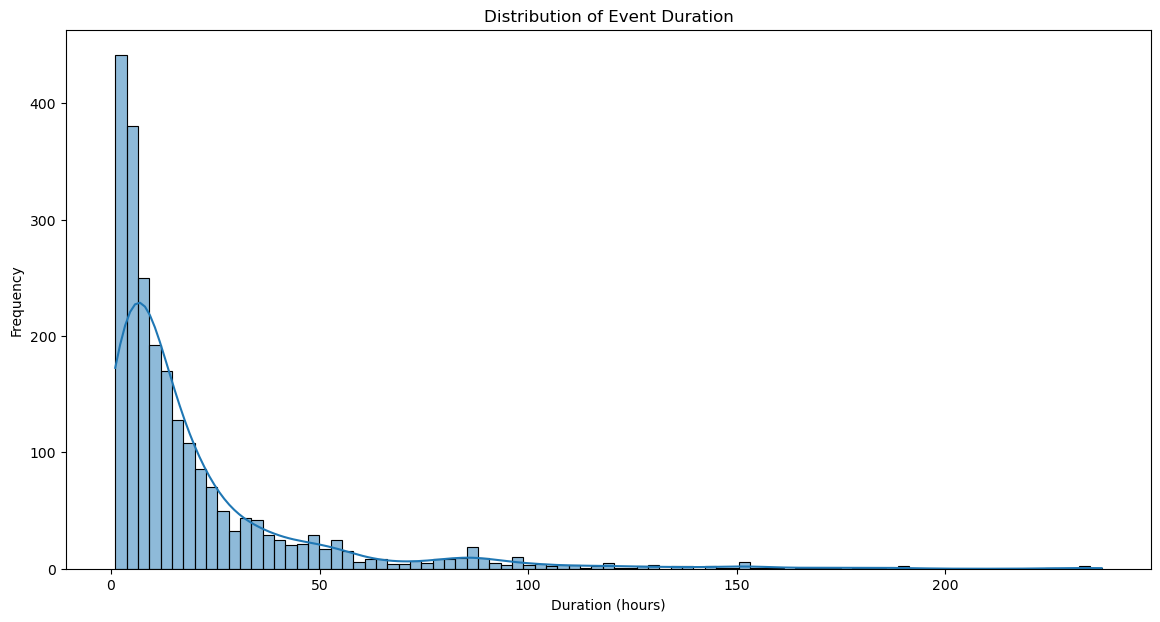

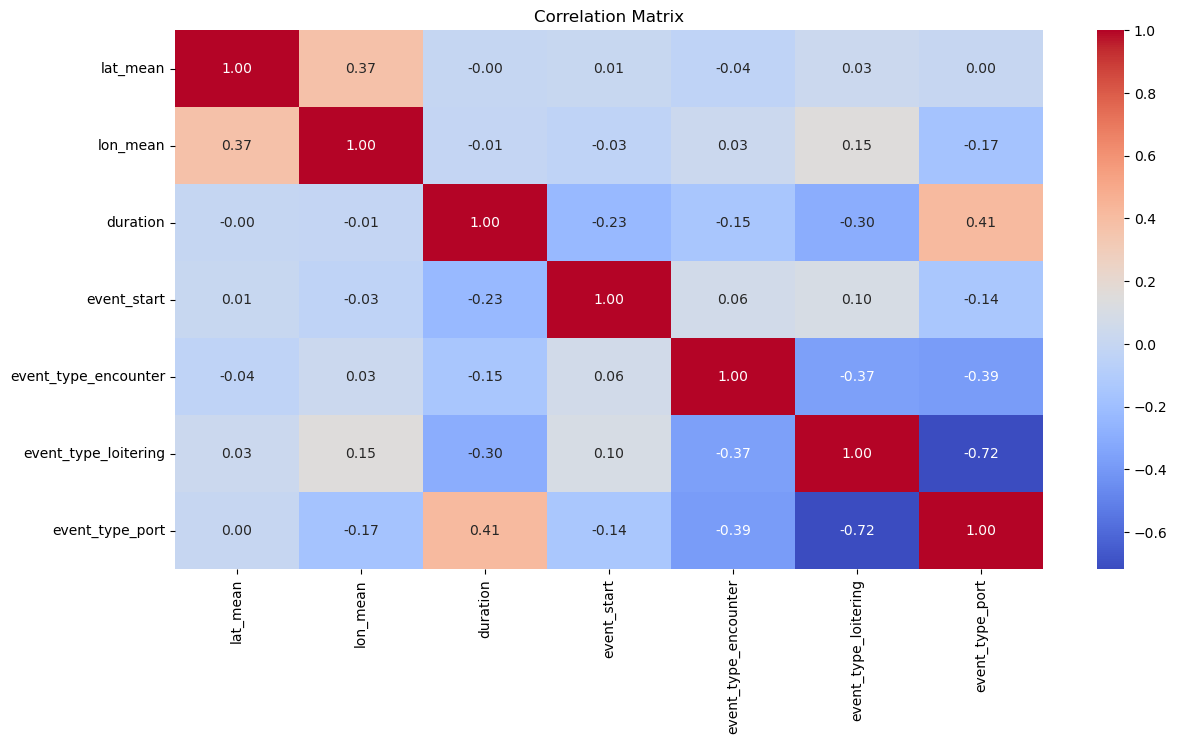

In [10]:
# Plot distributions of the features
plt.figure(figsize=(14, 7))
sns.histplot(data['duration'], kde=True)
plt.title('Distribution of Event Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
